In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [5]:
X,Y = data.data,data.target

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
X.shape, Y.shape

((569, 30), (569,))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [10]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [11]:
print('Results for the fitted DTree')
trn_acc = dt.score(X_train,y_train)
tst_acc = dt.score(X_test,y_test)
print('Train Acc: ', trn_acc)
print('test Acc: ', tst_acc)

Results for the fitted DTree
Train Acc:  1.0
test Acc:  0.8811188811188811


[Text(0.5595238095238095, 0.9444444444444444, 'x[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'), Text(0.35714285714285715, 0.8333333333333334, 'x[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'), Text(0.45833333333333337, 0.8888888888888888, 'True  '), Text(0.23809523809523808, 0.7222222222222222, 'x[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'), Text(0.14285714285714285, 0.6111111111111112, 'x[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'), Text(0.09523809523809523, 0.5, 'x[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'), Text(0.047619047619047616, 0.3888888888888889, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'), Text(0.14285714285714285, 0.3888888888888889, 'x[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'), Text(0.09523809523809523, 0.2777777777777778, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'), Text(0.19047619047619047, 0.2777777777777778, 'x[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1,

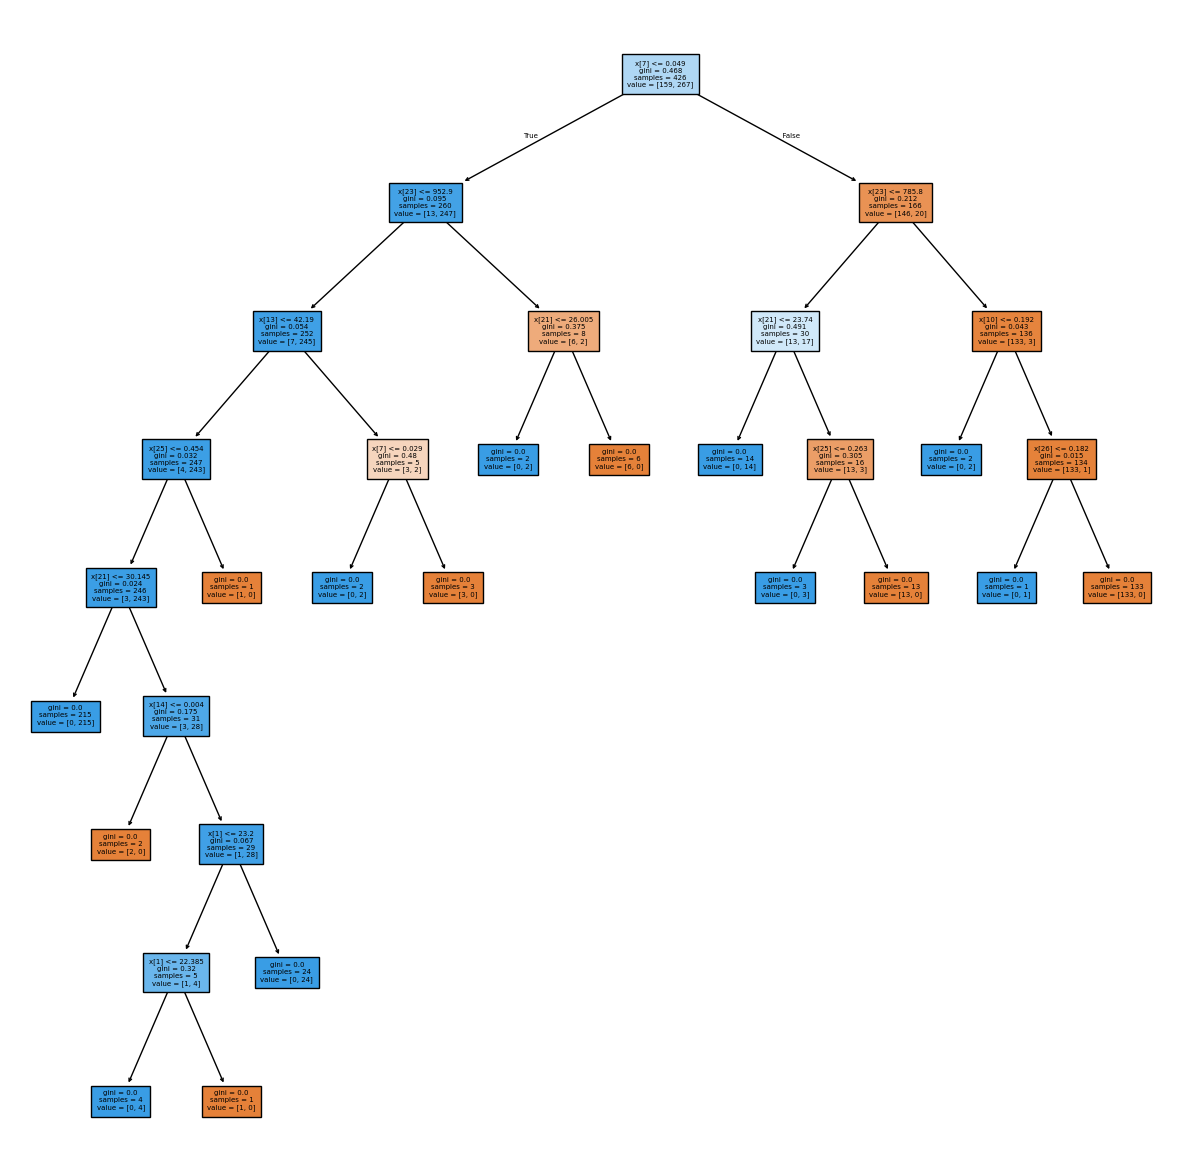

In [12]:
plt.figure(figsize=(15,15))
print(plot_tree(dt, filled=True, fontsize=5))

In [13]:
dt.tree_.max_depth, dt.tree_.node_count

(8, 31)

In [14]:
path = dt.cost_complexity_pruning_path(X_train, y_train)

In [15]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0, 0.5, 'Impurities')

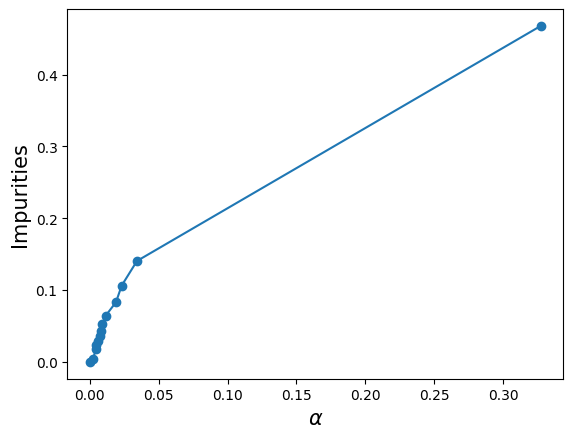

In [16]:
plt.plot(ccp_alphas, impurities, marker = 'o')
plt.xlabel(r'$\alpha$', fontsize = 15)
plt.ylabel('Impurities', fontsize = 15)

In [17]:
ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

In [18]:
ccp_alphas = np.unique(ccp_alphas)

In [19]:
ccp_alphas = ccp_alphas[:-1]

In [20]:
clfs = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=alpha, random_state=0)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [21]:
# Average CV accuracy results on the train set
cv_scores = [np.mean(cross_val_score(clf, X_train, y_train, cv=5)) for clf in clfs]

In [22]:
max(cv_scores)

np.float64(0.9155129958960329)

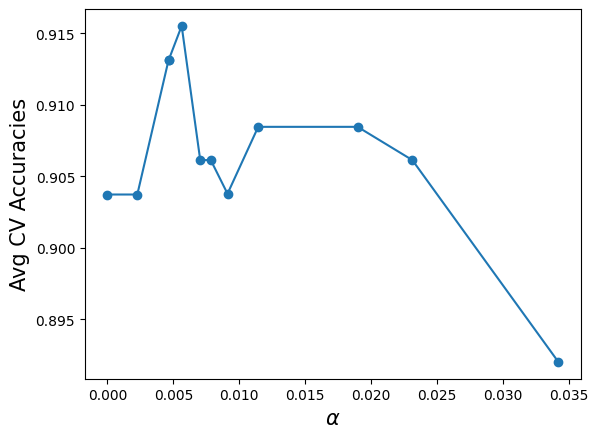

In [23]:
plt.plot(ccp_alphas, cv_scores, marker='o')
plt.xlabel(r'$\alpha$', fontsize = 15)
plt.ylabel('Avg CV Accuracies', fontsize = 15)
plt.show()

In [46]:
index = np.where(ccp_alphas == ccp_alphas[np.argmax(cv_scores)])[0]

In [50]:
index

array([4])

In [48]:
best_alpha = ccp_alphas[np.max(index)]
best_alpha

np.float64(0.005633802816901408)

In [26]:
ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475])

In [27]:
best_tree = DecisionTreeClassifier(ccp_alpha=0.005634, random_state=0)
best_tree.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.5, 0.9, 'x[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'), Text(0.25, 0.7, 'x[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'), Text(0.375, 0.8, 'True  '), Text(0.125, 0.5, 'x[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'), Text(0.0625, 0.3, 'gini = 0.032\nsamples = 247\nvalue = [4, 243]'), Text(0.1875, 0.3, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'), Text(0.375, 0.5, 'x[21] <= 26.005\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'), Text(0.3125, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'), Text(0.4375, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'), Text(0.75, 0.7, 'x[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'), Text(0.625, 0.8, '  False'), Text(0.625, 0.5, 'x[21] <= 23.74\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'), Text(0.5625, 0.3, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'), Text(0.6875, 0.3, 'x[25] <= 0.263\ngini = 0.305\nsamples = 16\nvalue = [13, 3]'), Text(0.625, 0.1, 'gini = 0.0\nsamples = 3\nvalue

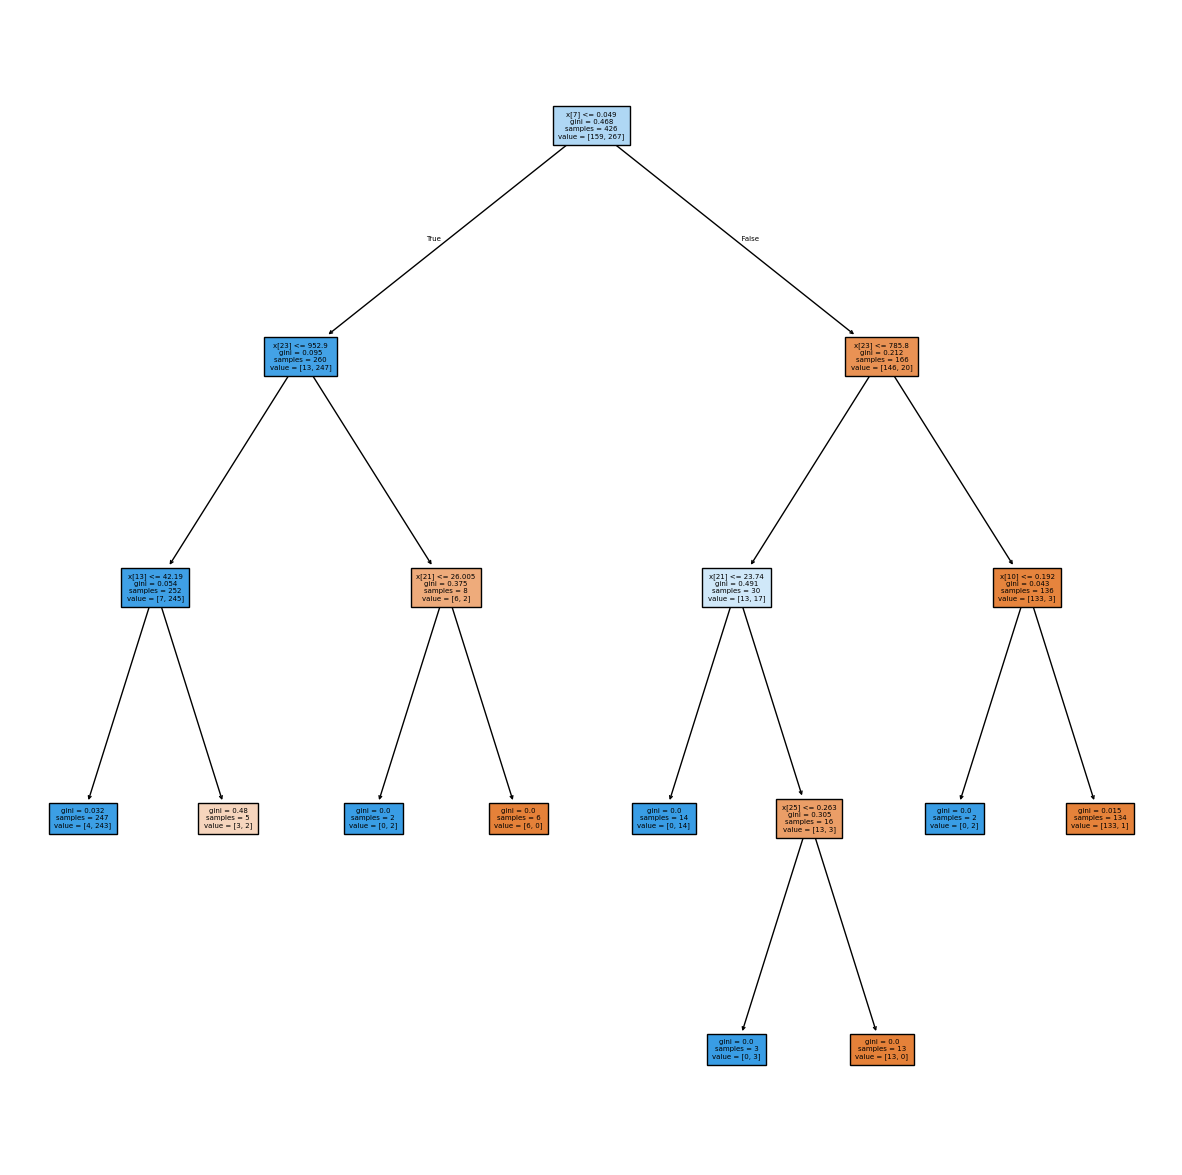

In [28]:
plt.figure(figsize=(15,15))
print(plot_tree(best_tree, filled=True, fontsize=5))

In [29]:
print('Results for the final fitted DTree')
trn_acc = best_tree.score(X_train,y_train)
tst_acc = best_tree.score(X_test,y_test)
print('Train Acc: ', trn_acc)
print('test Acc: ', tst_acc)

Results for the final fitted DTree
Train Acc:  0.9835680751173709
test Acc:  0.916083916083916


In [30]:
best_tree.tree_.max_depth, best_tree.tree_.node_count

(4, 17)

In [31]:
node_counts = [clf.tree_.node_count for clf in clfs]
depths = [clf.tree_.max_depth for clf in clfs]

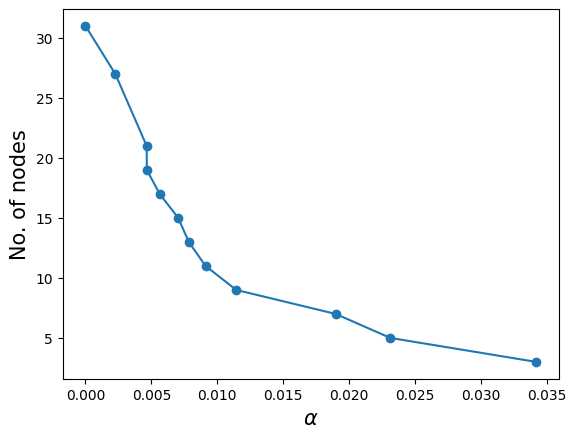

In [32]:
plt.plot(ccp_alphas, node_counts, marker='o')
plt.xlabel(r'$\alpha$', fontsize = 15)
plt.ylabel('No. of nodes', fontsize = 15)
plt.show()

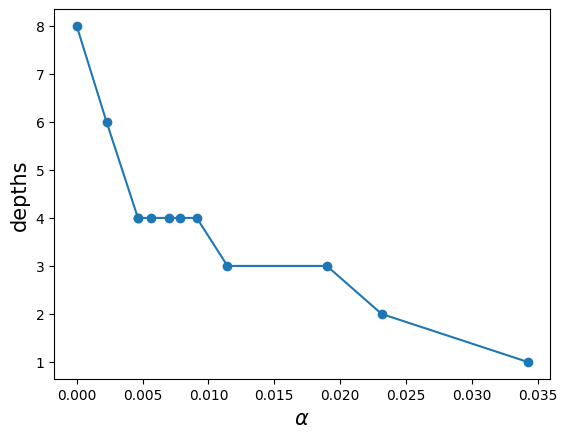

In [33]:
plt.plot(ccp_alphas, depths, marker='o')
plt.xlabel(r'$\alpha$', fontsize = 15)
plt.ylabel('depths', fontsize = 15)
plt.show()

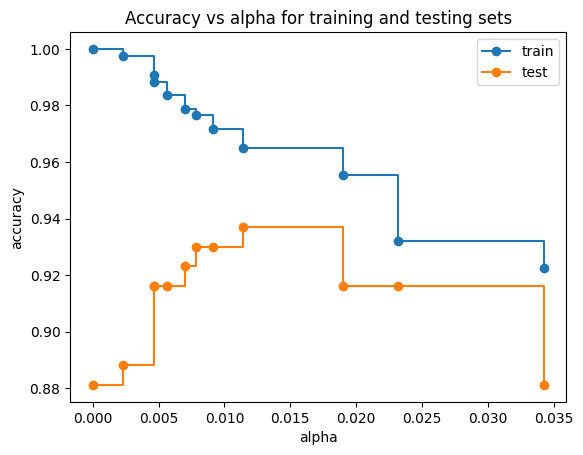

In [34]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("Accuracy vs alpha for training and testing sets")
plt.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
plt.legend()
plt.show()

In [35]:
pd.DataFrame({'Train acc': train_scores,
               'Test acc': test_scores,
               'Nodes': node_counts,
               'Depth': depths,
               'ccp_alphas': ccp_alphas,
               'CV_acc': cv_scores})

,Train acc,Test acc,Nodes,Depth,ccp_alphas,CV_acc
0,1.000000,0.881119,31,8,0.000000,0.903721
1,0.997653,0.888112,27,6,0.002266,0.903721
2,0.990610,0.916084,21,4,0.004647,0.913160
3,0.988263,0.916084,19,4,0.004660,0.913160
4,0.983568,0.916084,17,4,0.005634,0.915513
5,0.978873,0.923077,15,4,0.007042,0.906129
6,0.976526,0.930070,13,4,0.007842,0.906129
7,0.971831,0.930070,11,4,0.009114,0.903776
8,0.964789,0.937063,9,3,0.011444,0.908454
9,0.955399,0.916084,7,3,0.018988,0.908454


## Logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [38]:
model.score(X_train,y_train)

0.960093896713615

In [39]:
model.score(X_test,y_test)

0.951048951048951